# Session 5: Final Project – Fantasy Baseball Team Challenge

Welcome to the final session! In this project, you’ll draft a fantasy baseball team using real MLB data. You'll calculate statistics to evaluate players, and then you’ll assemble your dream team. However, the name of this game is identify a team that is best at [Small Ball]('https://en.wikipedia.org/wiki/Small_ball_(baseball)').

Your job is to draft players from 2024 on your team not based on the home runs, I know bummer, but using the following three metrics I created that are centered around a players small ball mentality: 

- **OBP (On-Base Percentage)**: Measures how often a batter reaches base on any play except for a fielder's choice or error. 
- **SBED (Stolen Base Effectiveness Differential)**: Highlights the efficiency of a player's attemped stolen bases
- **ATR (Assist-to-Run Ratio)**: Measures unselfish run-creation

In addition, use your favorite statistic or create a new metric that may help your team to win the fantasy small ball competition.

Good luck and have fun! 

## **Concepts Covered**
- Accessing real MLB data with the `pybaseball` package
- Calculating custom baseball metrics:
  - **OBP (On-Base Percentage)**: Measures how often a batter reaches base on any play except for a fielder's choice or error. 
  - **SBED (Stolen Base Effectiveness Differential)**: Highlights the efficiency of a player's attemped stolen bases with atleast twenty stolen bases
  - **ATR (Assist-to-Run Ratio)**: Measures unselfish run-creation
- Create your own custome statistic or use your favorite one
- Making data-driven decisions to build a fantasy team of your top 10 players. You do not have to have players at each position; rather, try to identify 10 players that excel the most across as many of your statistics as possible.

## Load Data

In [1]:
from pybaseball import batting_stats, fielding_stats, playerid_lookup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load stats for a specific season
year_value = 2024
batting_df = batting_stats(year_value)
fielding_df = fielding_stats(year_value)

## 1. On-Base Percentage 
Measures how often a batter reaches base on any play except for a fielder's choice or error.

**Formula:**

`OBP = (H + BB + HBP) / (AB + BB + HBP + SF)`

Where:
- H: Hits
- BB: Walks
- HBP: Hit by Pitch
- AB: At Bats
- SF: Sacrifice Flies 

In [26]:
batting_df[['Name', 'Team', 'OBP']].sort_values(
    by='OBP', ascending=False).head(10)

,Name,Team,OBP
0,Aaron Judge,NYY,0.458
2,Juan Soto,NYY,0.419
5,Vladimir Guerrero Jr.,TOR,0.396
4,Yordan Alvarez,HOU,0.392
1,Shohei Ohtani,LAD,0.390
3,Bobby Witt Jr.,KCR,0.389
14,Jurickson Profar,SDP,0.380
6,Marcell Ozuna,ATL,0.378
13,Freddie Freeman,LAD,0.378
10,Bryce Harper,PHI,0.373


## 2. Stolen Base Effectiveness Differential 
Highlights the efficiency of a player's attemped stolen bases. Also, ratio is only calculated when a player attemped 20 more stolen bases in that season.

**Formula:**

`Stolen Base Effectiveness Differential = (Stolen Bases - Stolen Bases Attemped) / Total Stolen Bases`

In [3]:
# Calculate Net_SB_Effectiveness only for players with at least 20 SB
batting_df['SBED'] = np.where(
    batting_df['SB'] >= 20,
    (batting_df['SB'] - batting_df['CS']) / (batting_df['SB'] + batting_df['CS']),
    0
)

# Fill any NaN values (just in case) with 0
batting_df['SBED'] = batting_df['SBED'].fillna(0)

# Optional: View top performers
print(batting_df[['Name', 'Team', 'SB', 'CS', 'SBED']].sort_values(
    by='SBED', ascending=False).head(10))

                 Name Team  SB  CS      SBED
52         Oneil Cruz  PIT  22   1  0.913043
128     Maikel Garcia  KCR  37   2  0.897436
1       Shohei Ohtani  LAD  59   4  0.873016
113      Bryson Stott  PHI  32   3  0.828571
115      Brice Turang  MIL  50   6  0.785714
88      Spencer Steer  CIN  25   3  0.785714
126        Zack Gelof  OAK  25   3  0.785714
19   Francisco Lindor  NYM  29   4  0.757576
124    Andres Gimenez  CLE  30   5  0.714286
59      Brenton Doyle  COL  30   5  0.714286


## 3. ATR - Assist-to-Run Ratio
Estimates a player's role in setting up scoring via sacrifices.

**Formula:**
`ATR = (Sac Flies + Sac Hits) / Plate Appearances`

In [4]:
batting_df['ATR'] = (batting_df['SF'] + batting_df['SH']) / batting_df['PA']

## 4. Favorite or Custom Statistics 
Use your favorite statistic or create a new metrics that may help your team to win the fantasy small ball competition. Here are mine:

**Percent of Runs Scored on Home Runs:** Small ball teams typically score a lower percentage of their runs on home runs compared to teams that prioritize power hitting. 

**Formula:**
`R_HR = HR / R`

In [12]:
batting_df['R_HR'] = batting_df['HR']/batting_df['R']
print(batting_df[['Name', 'Team', 'R', 'HR', 'R_HR']].sort_values(by='R_HR', ascending=True).head(10))

               Name   Team   R  HR      R_HR
116     Sal Frelick    MIL  66   2  0.030303
117     Jacob Young    WSN  75   3  0.040000
72      Luis Arraez  - - -  83   4  0.048193
98     Nico Hoerner    CHC  86   7  0.081395
128   Maikel Garcia    KCR  84   7  0.083333
115    Brice Turang    MIL  72   7  0.097222
118   Anthony Volpe    NYY  90  12  0.133333
85     Willi Castro    MIN  89  12  0.134831
124  Andres Gimenez    CLE  64   9  0.140625
25      Steven Kwan    CLE  83  14  0.168675


## 5. Fantasy Team
Making data-driven decisions to build a fantasy team of your top 10 players. You do not have to have players at each position; rather, try to identify 10 players that excel the most across as many of your statistics as possible.

In [24]:
batting_df['avg_value'] = (
    batting_df['OBP'] + batting_df['SBED'] + 
    batting_df['ATR'] + (1 - batting_df['R_HR']))/4
my_team_list = batting_df.sort_values(
    by='avg_value', ascending=False)[:10]['Name'][:10]

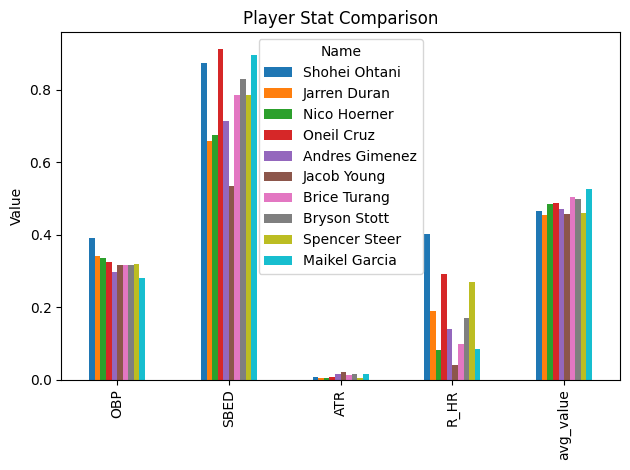

In [25]:
comparison_df = batting_df[batting_df['Name'].isin(my_team_list)][
    ['Name', 'OBP', 'SBED', 'ATR', 'R_HR', 'avg_value']]

comparison_df.set_index('Name').T.plot(
    kind='bar', title='Player Stat Comparison')
plt.ylabel('Value')
plt.tight_layout()
plt.show()